<a href="https://colab.research.google.com/github/Asazin007/ComputerVision/blob/main/BRIEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
!pip3 install opencv-python

In [35]:
image1 = cv2.imread('Taj1.webp', cv2.IMREAD_COLOR)
image2 = cv2.imread('/content/taj2-463924915.jpg', cv2.IMREAD_COLOR)

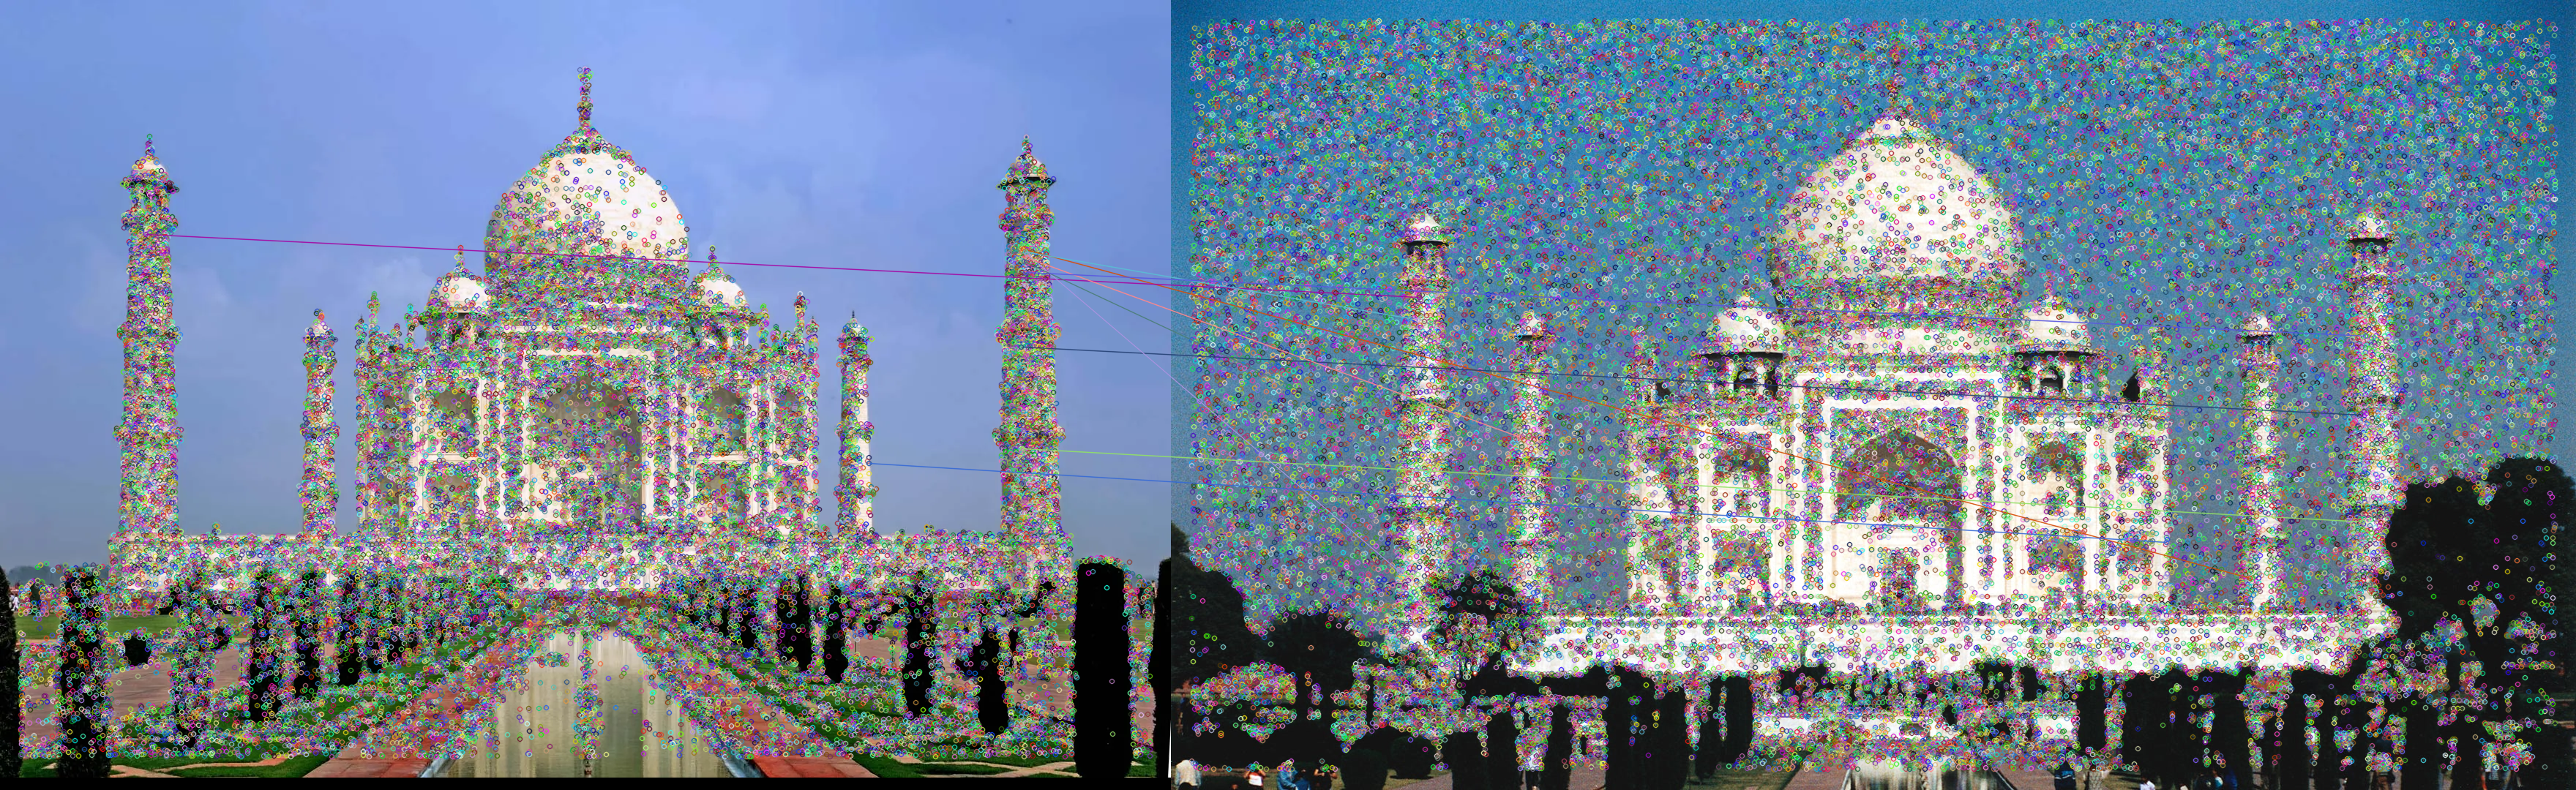

In [36]:
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

fast = cv2.FastFeatureDetector_create()

# Compute keypoints for both images
keypoints1 = fast.detect(image1, None)
keypoints2 = fast.detect(image2, None)

# Compute descriptors for both images using the keypoints
keypoints1, descriptors1 = brief.compute(image1, keypoints1)
keypoints2, descriptors2 = brief.compute(image2, keypoints2)


bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

matches = sorted(matches, key=lambda x: x.distance)

matching_result = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], outImg=None)
cv2_imshow(matching_result)
cv2.waitKey(0)
cv2.destroyAllWindows()